In [1]:
import matplotlib.pyplot as plt
import numpy as np

from faults import rauw_simple_fault

from synthacc.space2 import DiscretizedRectangularSurface as Surface
from synthacc.source.rupture.velocity import ConstantVDC, RandomFieldVDC, LayeredRandomFieldVDC, GP2010VDC
from synthacc.source.rupture.propagation import TravelTimeCalculator, ConstantVelocityTravelTimeCalculator

In [2]:
d = 101
segment = rauw_simple_fault()
segment = segment.get_discretized(shape=Surface(segment.width, segment.length, d, d).shape)
magnitude = 6.5

start1 = (segment.width/2, segment.length/2)
start2 = (0, 0)

## Constant

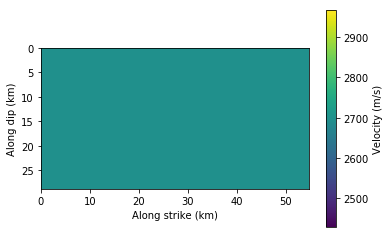

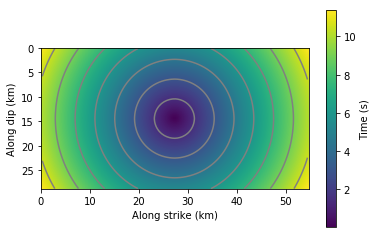

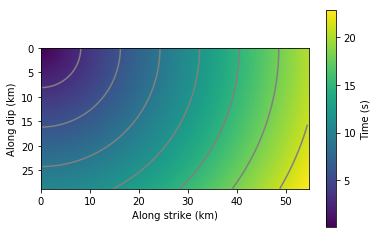

In [3]:
c = ConstantVDC(2400, 3000)

vd = c(segment)
vd.plot()

ttc = TravelTimeCalculator(vd, d)

tts = ttc(*start1)
tts.plot(contours=True)

tts = ttc(*start2)
tts.plot(contours=True)

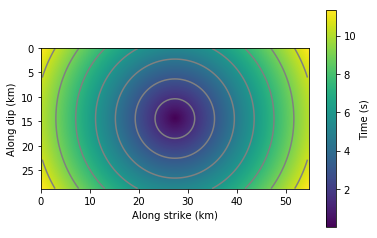

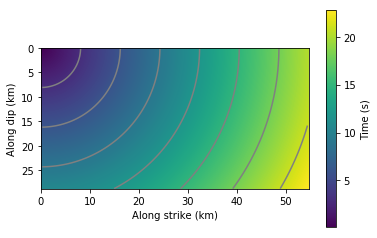

In [4]:
cvttc = ConstantVelocityTravelTimeCalculator(segment, vd.avg)

tts = cvttc(*start1)
tts.plot(contours=True)

tts = cvttc(*start2)
tts.plot(contours=True)

## Random field

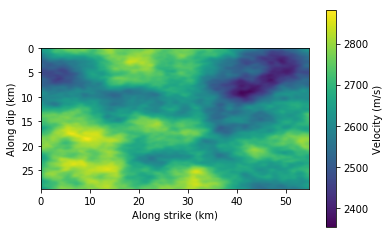

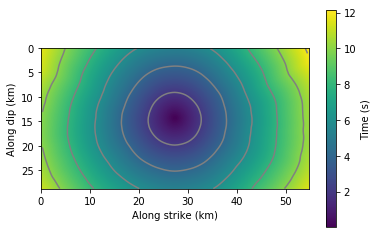

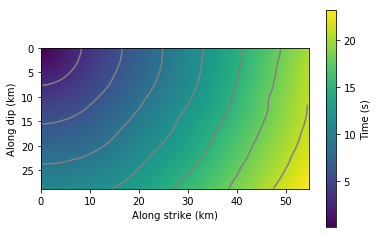

In [5]:
c = RandomFieldVDC(2400, 3000, sd=100)

vd = c(segment)
vd.plot()

ttc = TravelTimeCalculator(vd, d)

tts = ttc(*start1)
tts.plot(contours=True)

tts = ttc(*start2)
tts.plot(contours=True)

## Layered Random Field

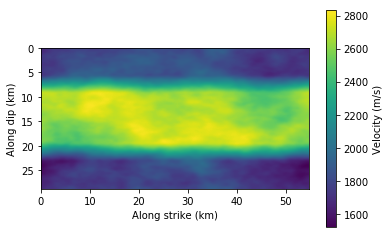

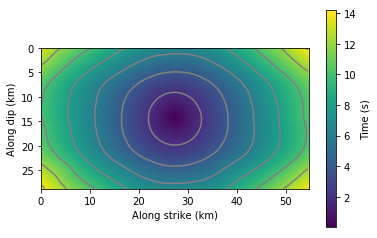

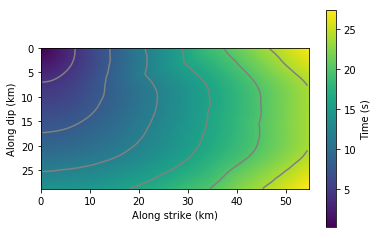

In [6]:
c = LayeredRandomFieldVDC(2400, 3000, sd=100)

vd = c(segment)
vd.plot()

ttc = TravelTimeCalculator(vd, d)

tts = ttc(*start1)
tts.plot(contours=True)

tts = ttc(*start2)
tts.plot(contours=True)

## Vs

In [7]:
vs = np.array([
    [0, 2976],
    [1000, 2976],
    [1000, 3274],
    [2000, 3274],
    [2000, 3452],
    [3000, 3452],
    [3000, 3571],
    [12000, 3571],
    [12000, 3720],
    [19000, 3720],
    [19000, 3869],
    [32500, 3869],
    [32500, 4804],
])

c = GP2010VDC(vs)

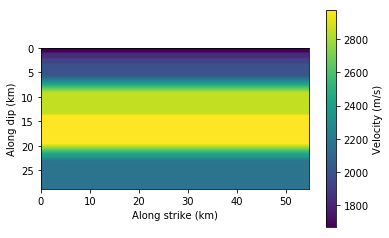

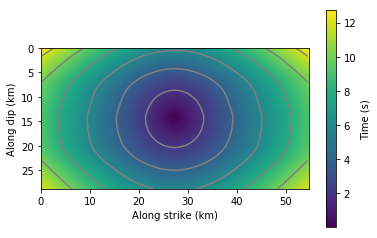

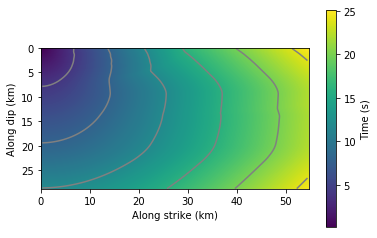

In [8]:
vd = c(segment, None, None)
vd.plot()

ttc = TravelTimeCalculator(vd, d)

tts = ttc(*start1)
tts.plot(contours=True)

tts = ttc(*start2)
tts.plot(contours=True)